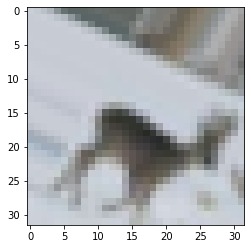

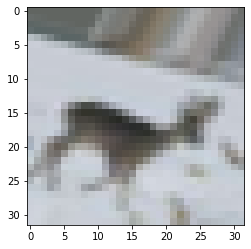

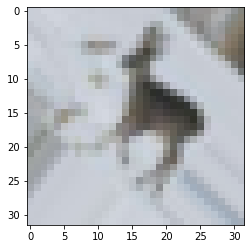

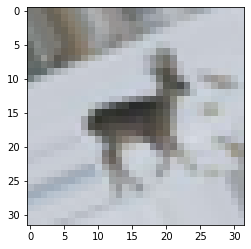

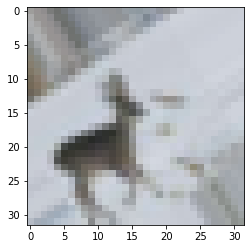

In [2]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# creates a data generator object that transforms images
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

# pick an image to transform
test_img = train_images[20]
img = image.img_to_array(test_img)  # convert image to numpy arry
img = img.reshape((1,) + img.shape)  # reshape image

i = 0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):  # this loops runs forever until we break, saving images to current directory with specified prefix
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i > 4:  # show 4 images
        break

plt.show()


In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=4, 
                    validation_data=(test_images, test_labels))
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

Train on 50000 samples, validate on 10000 samples
Epoch 1/4
50000/50000 [==============================] - 25s 495us/sample - loss: 1.4924 - accuracy: 0.4586 - val_loss: 1.2682 - val_accuracy: 0.5425
Epoch 2/4
50000/50000 [==============================] - 19s 382us/sample - loss: 1.1394 - accuracy: 0.5964 - val_loss: 1.0598 - val_accuracy: 0.6247
Epoch 3/4
50000/50000 [==============================] - 22s 450us/sample - loss: 0.9900 - accuracy: 0.6525 - val_loss: 0.9406 - val_accuracy: 0.6670
Epoch 4/4
50000/50000 [==============================] - 22s 449us/sample - loss: 0.8935 - accuracy: 0.6890 - val_loss: 0.9355 - val_accuracy: 0.6711
10000/10000 - 2s - loss: 0.9355 - accuracy: 0.6711
0.6711
